# Ocean Data Plot

In [2]:
# IMPORT MODULES [velocity_download environment]
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [22]:
# OPEN THE ALAMO DATA (F9250 & F9313) FILTERED BETWEEN A POTENTIAL DENSITY THRESHOLD OF 27.2 AND 27.31 
ALAMO_F9250 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9250/f9250_pd_27.10_27.31.csv')
ALAMO_F9313 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9313/f9313_pd_27.10_27.31.csv')

# OPEN THE GEM DATA FILTERED BETWEEN A POTENTIAL DENSITY THRESHOLD OF 27.2 AND 27.31
GEM_DATA = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/gem_ctd_disko_bay/ctd_filtered_disko_bay.csv')

# OPEN THE APEX F1984 DATA FILTERED BETWEEN A POTENTIAL DENSITY THRESHOLD OF 27.2 AND 27.31
APEX_F9184_DATA = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_apex_f9184/f9184_pd_27.10_27.31.csv')

# DEFINE THE DATE AND TEMPERATURE VARIABLES FOR EACH DATASET
ALAMO_F9250_DATE = pd.to_datetime(ALAMO_F9250['date'], dayfirst=True)
ALAMO_F9313_DATE = pd.to_datetime(ALAMO_F9313['date'], dayfirst=True)
GEM_DATE = pd.to_datetime(GEM_DATA['Date'])
APEX_F9184_DATE = pd.to_datetime(APEX_F9184_DATA['TIME'], format='%Y%m%dT%H%M%S')

ALAMO_F9250_TEMP = ALAMO_F9250['temperature']
ALAMO_F9313_TEMP = ALAMO_F9313['temperature']
GEM_TEMP = GEM_DATA['Temp (Â°C)']
APEX_F9184_TEMP = APEX_F9184_DATA['TEMP']

In [23]:
# INPUT DESIRED X AXIS, Y AXIS, AND PLOT TITLES
xtitle = 'Date'
ytitle = 'Disko Bay Temperature (\u00B0C)'
title = 'Disko Bay Water Temperature \n (27.20 $\leq \sigma_{\u03B8} \leq$ 27.31)'

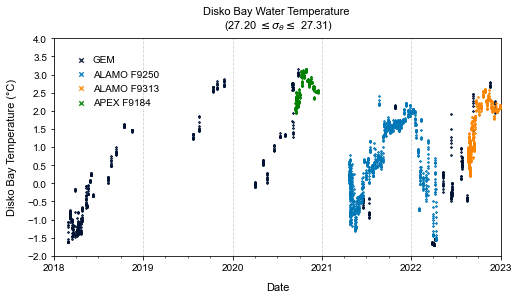

In [24]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
plt.title(title, pad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.ylabel(ytitle, labelpad=10, fontsize=11)
plt.xlabel(xtitle, labelpad=10, fontsize=11)

plt.scatter(GEM_DATE, GEM_TEMP, s=3, marker='x', color='#001233', alpha=0.85, label='GEM', zorder=20)
plt.scatter(ALAMO_F9250_DATE, ALAMO_F9250_TEMP, color='#0077b6', s=3, marker='x', alpha=0.85, label='ALAMO F9250', zorder=20)
plt.scatter(ALAMO_F9313_DATE, ALAMO_F9313_TEMP, color='#fb8500', s=3, marker='x', alpha=0.85, label='ALAMO F9313', zorder=20)
plt.scatter(APEX_F9184_DATE, APEX_F9184_TEMP, color='green', s=3, marker='x', alpha=0.85, label='APEX F9184', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -2
max_y_value = 4
interval_y = 0.5
plt.ylim(bottom=min_y_value, top=max_y_value)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=1)
ax.yaxis.set_minor_locator(minor_locator)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.98), fontsize=10, markerscale=2.6, frameon=False, framealpha=1, handletextpad=0.15, handleheight=0.8, facecolor='white', borderaxespad = 0.8, borderpad=0.45, fancybox=False)
plt.show()